# Step 1

We need to create a Dataframe of the dataset, and even before that certain libraries have to be imported.

In [11]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

order_detail = pd.read_csv('Order_details(masked).csv')
print(order_detail)

           Name                      Email  \
0      PERSON_1         PERSON_1@gmail.com   
1      PERSON_2  PERSON_2@tataprojects.com   
2      PERSON_3         PERSON_3@gmail.com   
3      PERSON_4         PERSON_4@gmail.com   
4      PERSON_5         PERSON_5@gmail.com   
..          ...                        ...   
576  PERSON_522       PERSON_522@gmail.com   
577  PERSON_523       PERSON_523@gmail.com   
578  PERSON_523       PERSON_523@gmail.com   
579  PERSON_524       PERSON_524@gmail.com   
580  PERSON_525       PERSON_525@gmail.com   

                                               Product     Transaction Date  
0                                           PRODUCT_75  01/03/2021 00:47:26  
1                                           PRODUCT_75  01/03/2021 02:04:07  
2                                           PRODUCT_63  01/03/2021 09:10:43  
3                                           PRODUCT_63  01/03/2021 09:49:48  
4          PRODUCT_34,PRODUCT_86,PRODUCT_57,PRODUCT_89  0

# Step 2

Create a new column called Time that has the DateTime format after converting the Transaction Date column into it.

In [13]:
order_detail['Time'] = pd.to_datetime(order_detail['Transaction Date'])

order_detail['Hour'] = (order_detail)['Time'].dt.hour
print(order_detail['Hour'])

0       0
1       2
2       9
3       9
4      10
       ..
576    23
577    23
578    23
579    23
580    23
Name: Hour, Length: 581, dtype: int32


# Step 3

In [15]:
timemost1 = order_detail['Hour'].value_counts().index.tolist()[:24]  
  
timemost2 = order_detail['Hour'].value_counts().values.tolist()[:24] 

print(timemost1)
print(timemost2)

[23, 12, 22, 19, 21, 15, 20, 11, 13, 18, 16, 14, 17, 10, 0, 9, 8, 7, 1, 2, 5, 6, 3]
[51, 51, 45, 42, 41, 41, 39, 37, 33, 33, 29, 28, 27, 24, 17, 14, 10, 6, 4, 3, 3, 2, 1]


# step 4

In [19]:
tmost = np.column_stack((timemost1,timemost2)) 
  
print(" Hour Of Day" + "\t" + "Cumulative Number of Purchases \n") 
print('\n'.join('\t\t'.join(map(str, row)) for row in tmost)) 

 Hour Of Day	Cumulative Number of Purchases 

23		51
12		51
22		45
19		42
21		41
15		41
20		39
11		37
13		33
18		33
16		29
14		28
17		27
10		24
0		17
9		14
8		10
7		6
1		4
2		3
5		3
6		2
3		1


# Step 5

In [23]:
timemost = order_detail['Hour'].value_counts() 
timemost1 = [] 
  
for i in range(0,23): 
    timemost1.append(i) 
      
timemost2 = timemost.sort_index() 
timemost2.tolist() 
timemost2 = pd.DataFrame(timemost2) 

# Step 6

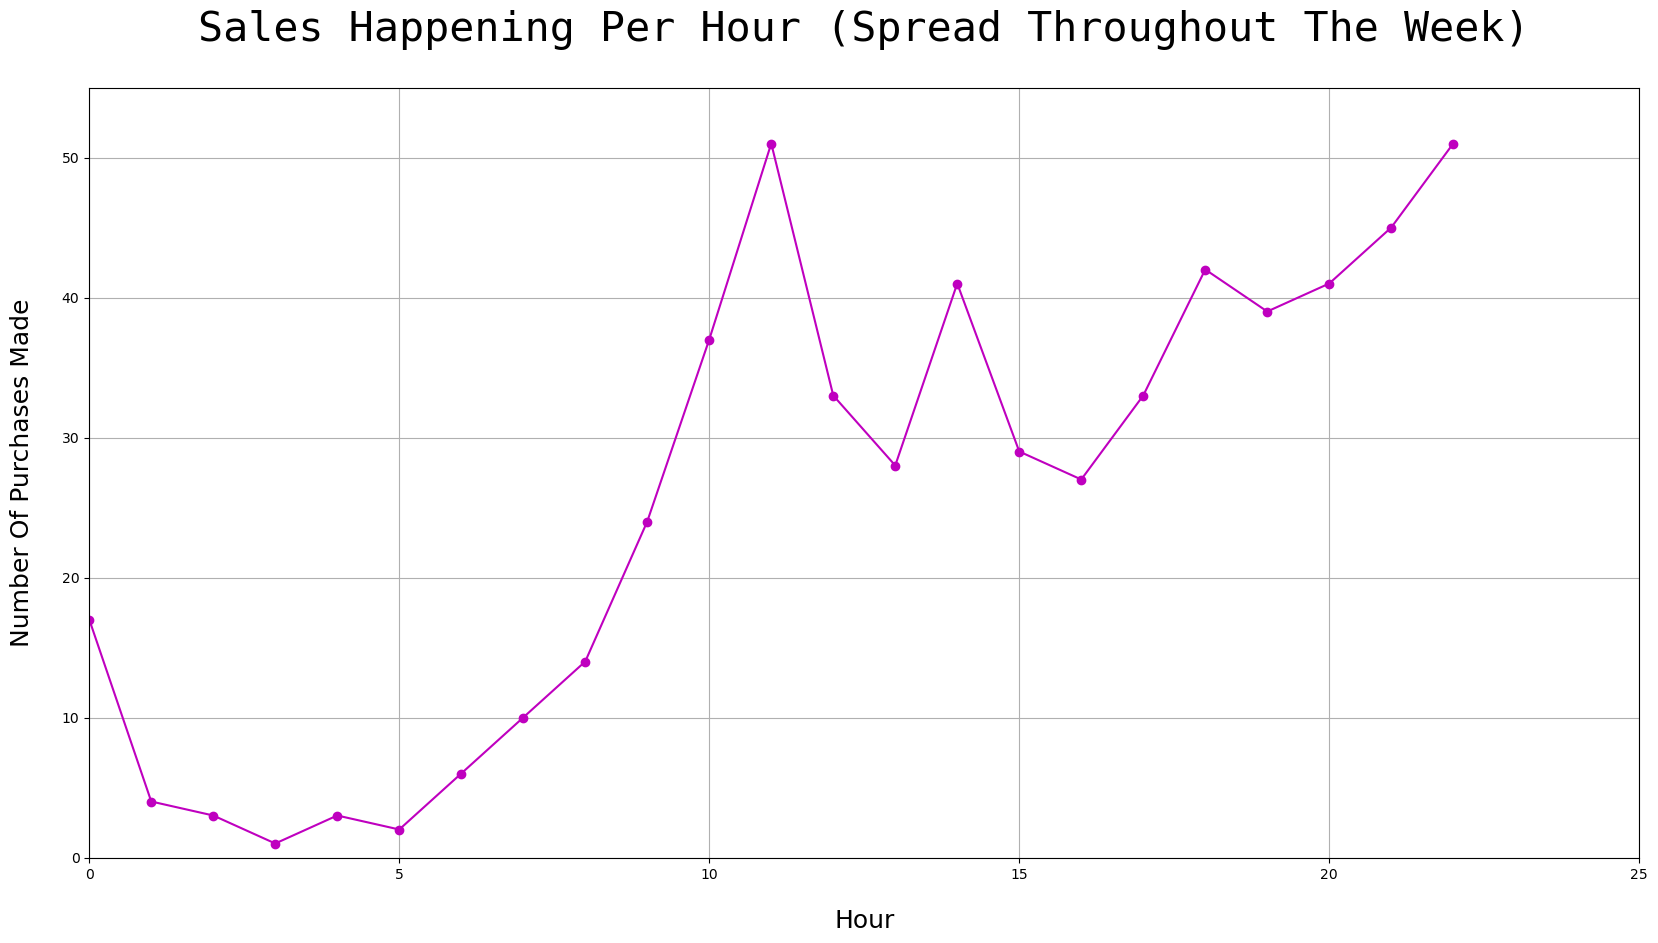

In [35]:
plt.figure(figsize=(20, 10)) 

plt.title('Sales Happening Per Hour (Spread Throughout The Week)', 
		fontdict={'fontname': 'monospace', 'fontsize': 30}, y=1.05) 
plt.xlim(0, 25)  # Set x-axis limits
plt.ylim(0, 55) 

plt.ylabel("Number Of Purchases Made", fontsize=18, labelpad=20) 
plt.xlabel("Hour", fontsize=18, labelpad=20) 
plt.plot(timemost1, timemost2, color='m', marker = 'o') 
plt.grid() 
plt.show() 